In [2]:
import os
from tqdm import tqdm
import pandas as pd
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
from pathlib import Path 
from unidip import UniDip
import unidip.dip as dip
from sorted_alpha import sorted_alphanumeric

In [3]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [38]:
path_boxes = '/Users/andreibirladeanu/Documents/Data/experimenting/visualize/1250_meal/skel3/'
boxes = [x for x in sorted_alphanumeric(os.listdir(path_boxes)) if x[0]!="."]
boxes = [cv2.imread(path_boxes + x) for x in boxes]

In [83]:
np.mean(boxes[0])

115.19323671497584

In [85]:
boxes[0].shape

(98, 69, 3)

In [9]:
def find_min_round(array):
    array = np.array(array)
    x = round(np.min(array[np.nonzero(array)]))
    return(x)

def find_max_round(array):
    array = np.array(array)
    x = round(np.max(array))
    return(x)

In [60]:
### mean across the first channel of all the pics
np.mean(boxes[0], axis=2).shape

(115, 122)

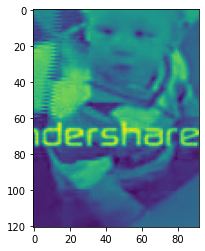

In [14]:
plt.imshow(np.mean(boxes[1], axis=2))


In [24]:
for_hist =  np.array([[np.mean(np.mean(x, axis=2))] for x in boxes])
for_dip =  np.array([np.mean(np.mean(x, axis=2)) for x in boxes])

(array([ 2.,  2., 24., 47., 29., 34., 24., 17., 17.,  3.]),
 array([58.17547366, 61.42597775, 64.67648184, 67.92698593, 71.17749002,
        74.42799411, 77.6784982 , 80.92900229, 84.17950638, 87.43001047,
        90.68051457]),
 <BarContainer object of 10 artists>)

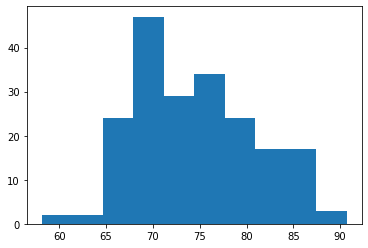

In [39]:
plt.hist(for_hist)

In [143]:
for x,y in zip(range(len(for_hist)), range(len(boxes))):
    if for_hist[x]<np.mean(for_hist):
        cv2.imshow('below mode',boxes[y])
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [17]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(for_hist)

In [34]:
gm.means_

array([[143.55956745],
       [113.38657381]])

In [35]:
labels = gm.predict(for_hist) 

In [36]:
labels[0]

1

In [38]:
np.where(labels==1)

(array([   0,    1,    2, ..., 8975, 8976, 8977]),)

In [241]:
for x in np.where(labels==2)[0]:
    cv2.imshow('child', boxes[x])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

0

In [ ]:
#### idea: get 3 gaussians and if the third one is less than 15% of the data throw it away 

In [40]:
data = np.msort(for_dip)
print(dip.diptst(data))


(0.03631517291760622, 0.058941058941058944, (37, 78))


In [16]:
intervals

[(570, 4965),
 (4968, 5204),
 (5208, 5721),
 (5725, 5967),
 (6169, 6656),
 (6662, 8394)]

In [17]:
unimodal = dip.diptst(data)

In [18]:
unimodal[1]

0.000999000999000999

In [54]:
####### try it with bounding boxes

['frame_1.csv', 'frame_2.csv', 'frame_3.csv', 'frame_4.csv', 'frame_5.csv', 'frame_6.csv', 'frame_7.csv', 'frame_8.csv', 'frame_9.csv', 'frame_10.csv', 'frame_11.csv', 'frame_12.csv', 'frame_13.csv', 'frame_14.csv', 'frame_15.csv', 'frame_16.csv', 'frame_17.csv', 'frame_18.csv', 'frame_19.csv', 'frame_20.csv', 'frame_21.csv', 'frame_22.csv', 'frame_23.csv', 'frame_24.csv', 'frame_25.csv', 'frame_26.csv', 'frame_27.csv', 'frame_28.csv', 'frame_29.csv', 'frame_30.csv', 'frame_31.csv', 'frame_32.csv', 'frame_33.csv', 'frame_34.csv', 'frame_35.csv', 'frame_36.csv', 'frame_37.csv', 'frame_38.csv', 'frame_39.csv', 'frame_40.csv', 'frame_41.csv', 'frame_42.csv', 'frame_43.csv', 'frame_44.csv', 'frame_45.csv', 'frame_46.csv', 'frame_47.csv', 'frame_48.csv', 'frame_49.csv', 'frame_50.csv', 'frame_51.csv', 'frame_52.csv', 'frame_53.csv', 'frame_54.csv', 'frame_55.csv', 'frame_56.csv', 'frame_57.csv', 'frame_58.csv', 'frame_59.csv', 'frame_60.csv', 'frame_61.csv', 'frame_62.csv', 'frame_63.csv', 

In [73]:
path_openpose = '/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1122_meal/skel1/'
coords = [file for file in sorted_alphanumeric(os.listdir(path_openpose)) if file[0] !="."]


In [74]:
### get bounding boxes now 
path_video = '/Users/andreibirladeanu/Documents/Data/experimenting/videos/1122_meal.mp4'
path_boxes = '/Users/andreibirladeanu/Documents/Data/experimenting/bounding_boxes/skel1/'
cap = cv2.VideoCapture(path_video)

#for skel in skeletons1:
#    x_array = list(skel.values())[0][0]
#    y_array = list(skel.values())[0][1]
#    cap.set(1, list(skel.keys())[0])
#    ret, image = cap.read()
#    print(skel)
#    cv2.imwrite(path_boxes + str(list(skel.keys())[0]) + '.png', image[find_min_round(y_array):find_max_round(y_array),
#                   find_min_round(x_array):find_max_round(x_array)])

In [75]:
for frame in coords:
    skel = pd.read_csv(path_openpose + frame)
    cap.set(1,int(frame.split('.')[0]))
    ret, image = cap.read()
    cv2.imwrite(path_boxes + str(frame.split('.')[0]) + '.png', image[find_min_round(skel['y']):find_max_round(skel['y']),
           find_min_round(skel['x']):find_max_round(skel['x'])])

TypeError: 'NoneType' object is not subscriptable

In [57]:
coords

['frame_1.csv',
 'frame_2.csv',
 'frame_3.csv',
 'frame_4.csv',
 'frame_5.csv',
 'frame_6.csv',
 'frame_7.csv',
 'frame_8.csv',
 'frame_9.csv',
 'frame_10.csv',
 'frame_11.csv',
 'frame_12.csv',
 'frame_13.csv',
 'frame_14.csv',
 'frame_15.csv',
 'frame_16.csv',
 'frame_17.csv',
 'frame_18.csv',
 'frame_19.csv',
 'frame_20.csv',
 'frame_21.csv',
 'frame_22.csv',
 'frame_23.csv',
 'frame_24.csv',
 'frame_25.csv',
 'frame_26.csv',
 'frame_27.csv',
 'frame_28.csv',
 'frame_29.csv',
 'frame_30.csv',
 'frame_31.csv',
 'frame_32.csv',
 'frame_33.csv',
 'frame_34.csv',
 'frame_35.csv',
 'frame_36.csv',
 'frame_37.csv',
 'frame_38.csv',
 'frame_39.csv',
 'frame_40.csv',
 'frame_41.csv',
 'frame_42.csv',
 'frame_43.csv',
 'frame_44.csv',
 'frame_45.csv',
 'frame_46.csv',
 'frame_47.csv',
 'frame_48.csv',
 'frame_49.csv',
 'frame_50.csv',
 'frame_51.csv',
 'frame_52.csv',
 'frame_53.csv',
 'frame_54.csv',
 'frame_55.csv',
 'frame_56.csv',
 'frame_57.csv',
 'frame_58.csv',
 'frame_59.csv',
 'fram

In [5]:
path = "/Users/andreibirladeanu/Documents/Data/experimenting/tracked/1117_meal/skel1_tr1/2.csv"
data = pd.read_csv(path)

In [8]:
data['x'].loc[8]

215.04

In [18]:
### lets try to draw proper contours around people
def torso_size(data):
    neck = [data['x'].loc[1], data['y'].loc[1]]
    if neck ==0:
        return(0)
    hip1 = [data['x'].loc[8], data['y'].loc[8]]
    hip2 = [data['x'].loc[11], data['y'].loc[11]]
    if hip1[0]>0 and hip2[0]>0:
        probabilities = [data['p'].loc[8], data['p'].loc[11]]
        max_p = np.argmax(probabilities)
        if max_p==0:
            torso = np.subtract(hip1, neck)
        else:
            torso = np.subtract(hip2, neck)
    elif hip1[0]==0:
        torso = np.subtract(hip2, neck)
    else:
        torso = np.subtract(hip1, neck)
    return(torso)
        
        

In [11]:
tuple1 = [2,3]
tuple2 = [1,2]

In [13]:
np.subtract(tuple1, tuple2)

array([1, 1])

In [19]:
torso_size(data)

array([-61.44, 167.04])

In [20]:
data

,Unnamed: 0,x,y,p
0,0,360.96,207.36,0.81
1,1,276.48,236.16,0.61
2,2,268.80,253.44,0.54
3,3,307.20,380.16,0.55
4,4,407.04,345.60,0.61
5,5,284.16,218.88,0.32
6,6,322.56,316.80,0.69
7,7,391.68,328.32,0.44
8,8,215.04,403.20,0.26
9,9,0.00,0.00,0.00
